In [1]:
# MNIST
# DATALOADER, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation
# GPU support

In [12]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 #28*28
hidden_size = 100 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root='../data', train = True,
                                           transform= transforms.ToTensor(), download=False)
test_dataset = torchvision.datasets.MNIST(root='../data', train= False,
    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset= train_dataset,
                                           batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset= test_dataset,
                                           batch_size=batch_size, shuffle=False)

In [10]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


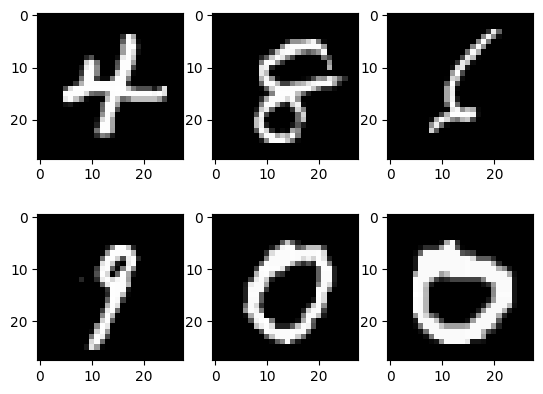

In [11]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [13]:
class NeuralNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    

    

In [14]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #100, 1, 28, 28
        #100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        #forward 
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

            


epoch 1 / 2, step 100/600, loss = 0.3313
epoch 1 / 2, step 200/600, loss = 0.3122
epoch 1 / 2, step 300/600, loss = 0.3613
epoch 1 / 2, step 400/600, loss = 0.3362
epoch 1 / 2, step 500/600, loss = 0.1945
epoch 1 / 2, step 600/600, loss = 0.2184
epoch 2 / 2, step 100/600, loss = 0.2810
epoch 2 / 2, step 200/600, loss = 0.1550
epoch 2 / 2, step 300/600, loss = 0.2934
epoch 2 / 2, step 400/600, loss = 0.1990
epoch 2 / 2, step 500/600, loss = 0.3539
epoch 2 / 2, step 600/600, loss = 0.1750


In [17]:
with torch.no_grad():
    n_correct =0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)


        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.41
